# **Assignment 1**


*   Jhaveri Aditya Alok - 2018A7PS0209H
*   Mihir Bansal - 2018A7PS0215H


*   Aditya Agarwal - 2017B1A71075H






In [1]:
%matplotlib inline
from google.colab import files
import sys
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

from scipy.stats import gamma
import random
import decimal
import math
from scipy.stats import norm
from matplotlib import rc
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
matplotlib.rcParams['animation.embed_limit'] = 2**128
from sympy.interactive import printing
matplotlib.use("Agg")
printing.init_printing()

# **Setup**

In [2]:
np.random.seed(123)

nobs=160
theta1 = float(decimal.Decimal(random.randrange(25,40))/100)
theta2 = float(decimal.Decimal(random.randrange(60,80))/100)
theta = random.choice([theta1,theta2])
#theta=0.5
print('The randomly generated MLE:', theta)
Y=np.random.binomial(1,theta, nobs)
print(Y)

The randomly generated MLE: 0.67
[0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 1 1 0 0 1]


# **Plotting the trials**

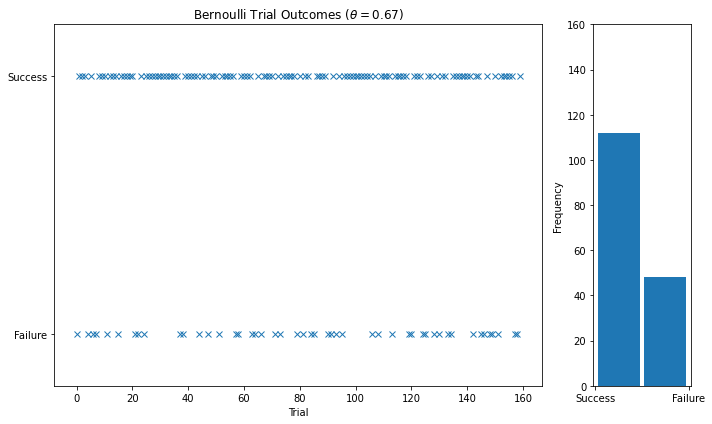

In [3]:
# Plotting the data
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,2, width_ratios=[5,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax2.hist(-Y, bins=2, rwidth=0.9)
ax1.plot(range(nobs), Y, 'x')


ax1.yaxis.set(ticks=(0,1), ticklabels=('Failure', 'Success'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Success', 'Failure'))

ax1.set(title=f'Bernoulli Trial Outcomes $(θ={theta})$', xlabel='Trial', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency', ylim=(0,nobs))

fig.tight_layout()

In [4]:
# Likelihood function

t, T, s = sp.symbols('theta, T, s')

# Create the function symbolically

likelihood = (t**s)*(1-t)**(T-s)

# Converting it to Numpy-callable function
_likelihood = sp.lambdify((t,T,s), likelihood, modules='numpy')

# **Plotting the prior**

Prior mean: 0.4


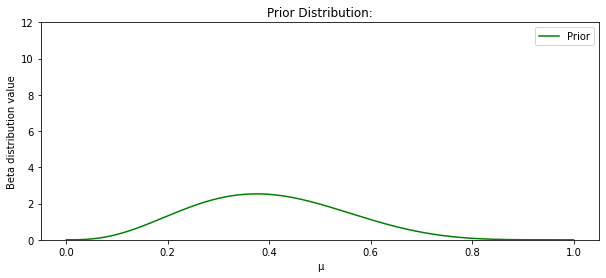

In [5]:
# Prior
# For alpha and beta
alpha = 4
beta = 6
prior_mean = alpha/(alpha + beta)
print('Prior mean:', prior_mean)

# Plot the prior 
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plt.xlabel('μ')
plt.ylabel('Beta distribution value')
X=np.linspace(0,1,1000)
ax.plot(X, stats.beta(alpha, beta).pdf(X), 'g')

# Cleanup
ax.set(title='Prior Distribution:', ylim=(0,12))
ax.legend(['Prior'])

# **Plotting the posterior (Lisa's way)**

Posterior Mean: 0.6823529411764706


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


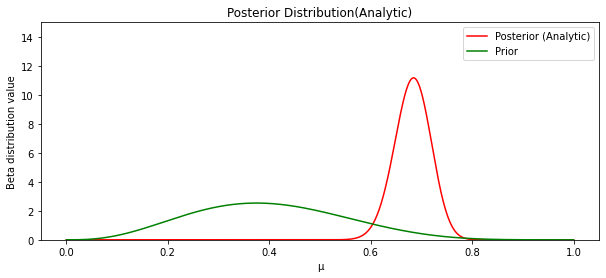

In [6]:
# Posterior
# Finding the hyperparameters of the posterior

alpha_hat = alpha + Y.sum()
beta_hat = beta + nobs - Y.sum()

# Posterior mean
post_mean = alpha_hat/(alpha_hat + beta_hat)
print('Posterior Mean:', post_mean)

# Plot the analytic posterior

fig = plt.figure(figsize=(10,4))
plt.xlabel('μ')
plt.ylabel('Beta distribution value')
ax= fig.add_subplot(111)
X = np.linspace(0,1,1000)
ax.plot(X, stats.beta(alpha_hat, beta_hat).pdf(X), 'r')

#Plot the prior
ax.plot(X, stats.beta(alpha, beta).pdf(X), 'g')

#Cleanup

ax.set(title='Posterior Distribution(Analytic)', ylim=(0,15))
ax.legend(['Posterior (Analytic)', 'Prior'])

# **For the Sequential Approach (Bob's way)**

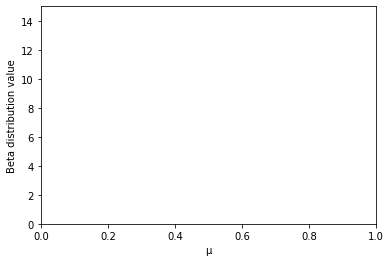

In [9]:
rc('animation', html='jshtml')

fig = plt.figure()
#ax= fig.add_subplot(111)
X = np.linspace(0,1,1000)
#ax.plot(X, stats.beta(alpha, beta).pdf(X), 'g')

axis = plt.axes(xlim =(0, 1),  
                ylim =(0, 15)) 
line, = axis.plot([], [], lw = 3) 

axis.set_xlabel('μ')
axis.set_ylabel('Beta distribution value')

def init():  
  line.set_data([], []) 
  return line, 
  
def animate(i):
  X = np.linspace(0,1,1000)
  y=Y[:(i+1)%nobs]
  alpha_hat = alpha + y.sum()
  beta_hat = beta + (i+1)%nobs - y.sum()
  line.set_data(X, stats.beta(alpha_hat, beta_hat).pdf(X))

  return line

anim = FuncAnimation(fig, animate, init_func = init, 
                     frames = nobs, interval = 20) 
anim

In [11]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('anim.mp4', writer=writer)
files.download('anim.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>